# 神经网络参数优化器参数概念

待优化参数 : $w$

损失函数：$loss$

学习率： $lr$

每次迭代一个*batch* ，$t$ 表示当前*batch*迭代的总次数。

1. 计算$t$时刻损失函数关于当前参数的梯度：$g_t = \nabla loss = \frac{\partial loss}{\partial w_t}$

2. 计算$t$时刻一阶动量$m_t$ 和二阶动量$v_t$

3. 计算$t$时刻下降梯度：$\eta_t = lr * m_t / \sqrt{v_t}$

4. 计算$t+1$时刻参数：$w_{t+1} = w_t - \eta_t = w_t - lr * m_t / \sqrt{v_t}$


一阶动量：与梯度相关的函数

二阶动量：与梯度平方相关的函数

 **什么是动量？**

动量是一种优化技术，用于加速梯度下降，并减少训练过程中的振荡。

动量会在每次参数更新时，结合当前梯度信息和之前的更新方向，从而使参数既考虑了当前梯度，也考虑了之前梯度的信息。从而避免参数更新在局部最优点或平坦地区的震荡。

 **什么是一阶动量？**
 
 一阶动量是梯度的历史加权平均值，在优化过程中起到了平滑和加速的作用。

 - 作用：让更新过程更稳定，不会因为梯度变化而剧烈震荡。
 - 好比：给小球加点“惯性”，能更平稳的滚向目标，而不会抖来抖去。

 **什么是二阶动量？**
 
二阶动量是梯度平方的加权平均值，用来衡量梯度的“强弱”

- 作用：调整学习率，梯度大时减速，梯度小时加速，让更新过程更稳定。
- 好比：给小球加点“阻力”，让小球在滚动的过程中，不会因为惯性而直接冲向目标。

**一阶动量 vs 二阶动量：对比总结**

| **属性**         | **一阶动量**                                                                 | **二阶动量**                                               |
|------------------|-----------------------------------------------------------------------------|----------------------------------------------------------|
| **定义**         | 梯度的加权平均，表示梯度的变化趋势（方向）。                                  | 梯度平方值的加权平均，表示梯度大小的变化趋势（幅度）。      |
| **公式**         | $ m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t $                           | $ v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2  $        |
| **含义**         | 平滑梯度更新方向，让参数更新更稳定、不震荡。                                   | 衡量梯度的大小，动态调整学习率，避免步子太大或太小。        |
| **物理类比**     | 类似“速度”：描述方向，指引前进路径。                                          | 类似“能量”：描述强度，调节步伐快慢。                      |
| **作用**         | 加速收敛、减少更新震荡，让训练过程更流畅。                                      | 动态调整学习率，避免学习率过大或过小导致的不稳定或停滞。     |
| **优化算法中的应用** | 用于加速梯度下降，比如 SGD with Momentum。                                  | 用于自适应学习率，比如 Adam 优化器。                      |

 **简单理解**
- **一阶动量**：决定“往哪里走”（更新的方向）。  
- **二阶动量**：决定“走多快”（更新的步伐）。  

**结合应用：**  
- 一阶动量负责减少震荡，让方向更稳定。  
- 二阶动量负责调节学习率，让步伐适应梯度大小，优化效率更高。  

 **$\eta_t$ 是什么意思？**
 
 $\eta_t$代表学习率调整因子，用于控制参数更新的步子大小。


# SGD优化器

SGD优化器（无momentum动量），常用的梯度下降方法。

**$t$时刻一阶动量** :  $m_t = g_t$ 

**$t$时刻二阶动量** : $v_t$ = 1

**$t$时刻下降梯度** : $\eta_t = lr * m_t / \sqrt{v_t} = lr * g_t$

**$t+1$时刻参数** : $w_{t+1} = w_t - \eta_t = w_t - lr * m_t / \sqrt{v_t} = w_t - lr * g_t$ 

**SGD TensorFlow中的应用:**

```python
w1.assign_sub(lr * w1_grad)
b1.assign_sub(lr * b1_grad)
```
---
解释：

 **为什么 $m_t$ = $g_t$ ？**

$ g_t = \frac{\partial L}{\partial w_t} $ ，表示损失函数  $L$  对当前参数  $w_t$  的梯度 

在没有使用动量的标准梯度下降中，动量等价于梯度，即 $m_t = g_t$ 

 **为什么 $v_t$ = 1？**

因为SGD的目标是提供一个简单，快速的梯度下降方法，每次更新只依赖于当前的梯度$g_t$，并不考虑梯度的历史（如平方的平均）所以 $v_t$ 恒等于1，也就是只考虑当前梯度。

 **为什么SGD 在TensorFlow中的应用为 w1.assign_sub(lr * w1_grad) ？**

在 TensorFlow 中， $w1_{\text{grad}}$  和  $b1_{\text{grad}}$  分别代表了对  $w1$  和  $b1$  的梯度，也就是  $\frac{\partial L}{\partial w1}$  和  $\frac{\partial L}{\partial b1}$ 。这些梯度是在计算过程中通过反向传播得到的。

- assign_sub 方法用于减去一个值，相当于执行 参数 - 梯度 × 学习率 的更新。
- 这实现了标准的梯度下降规则，即更新参数时沿着梯度方向反向移动，调整步长由学习率  lr  决定。
- TensorFlow 在这里通过 w1.assign_sub(lr * w1_grad) 来实现参数的更新，确保每次迭代都能根据梯度进行优化。

# SGD优化器应用

2024-12-06 15:22:11.257010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [120]
	 [[{{node Placeholder/_1}}]]
2024-12-06 15:22:11.285908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [30]
	 [[{{node Placeholder/_1}}]]


Epoch 0, loss: 0.2961753383278847
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.2916914001107216
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.2879278063774109
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.2844754345715046
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.2811388894915581
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.27782802283763885
Test_acc: 0.16666666666666666
--------------------------
Epoch 6, loss: 0.27450352162122726
Test_acc: 0.16666666666666666
--------------------------
Epoch 7, loss: 0.27115078270435333
Test_acc: 0.16666666666666666
--------------------------
Epoch 8, loss: 0.26776740700006485
Test_acc: 0.16666666666666666
--------------------------
Epoch 9, loss: 0.26435748115181923
Test_acc: 0.16666666666666666
--------------------------
Epoch 10, loss: 0.26092880219221115
Test_acc: 0.16666666666666666
-------------------

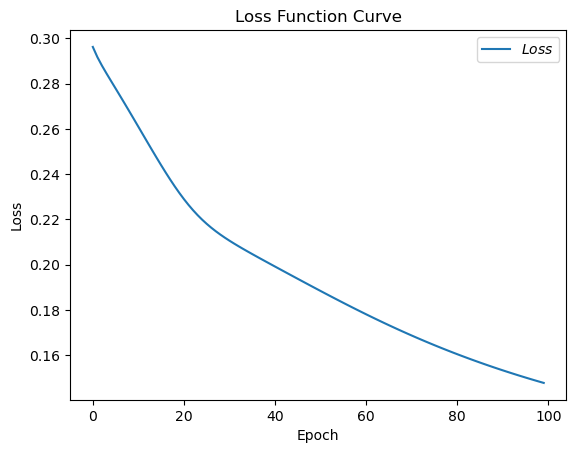

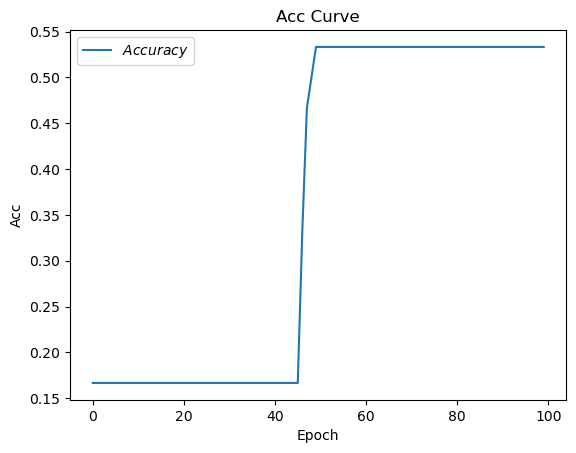

In [7]:
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.01  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 100  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])  # 参数b自更新

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 本文件较 class1\p45_iris.py 仅添加四处时间记录  用 ##n## 标识
# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况


# SGDM优化器

SGDM（含momentum的SGD）,在SGD的基础上，添加了一阶动量momentum，来加速SGD的收敛速度。

**$t$时刻一阶动量** : $m_t = \beta m_{t-1} + (1-\beta)g_t$

**$t$时刻二阶动量** : $v_t$ = 1

**$t$时刻下降梯度** : $\eta_t = lr * m_t / \sqrt{v_t} = lr * m_t  = lr * (\beta m_{t-1} + (1-\beta)g_t)$

**$t+1$时刻参数** : $w_{t+1} = w_t - \eta_t = w_t - lr * (\beta m_{t-1} + (1-\beta)g_t)$

SGDM 在TensorFlow中实现：
```python
m_w, m_b = 0,0
beta = 0.9

m_w = beta * m_w + (1-beta) * grads['w']
m_b = beta * m_b + (1-beta) * grads['b']

w1.assign_sub(lr * m_w)
b1.assign_sub(lr * m_b)
```

---
解释：

 **为什么SGDM要添加一阶动量momentum呢**？
- 加速收敛
- 减少震荡

 **为什么SGDM要使用动量参数beta呢？**

SGDM 算法的核心思想是引入动量来加速梯度下降并减少震荡。动量 $\beta$ 控制着历史梯度对当前更新的影响。
- 控制历史梯度的影响，$\beta$ 控制了历史梯度（即前几次更新）的衰减速度。如果 $\beta$ 越接近 1，则历史梯度的影响越大，动量的积累速度更慢，更新会更“保守”。如果 $\beta$ 越小，历史梯度对当前更新的影响越小，动量变化更迅速
- 平衡近期和历史梯度信息：$\beta$ 的设置帮助平衡当前梯度和历史梯度的贡献。在动量较大时，历史信息对更新的贡献更大，可以加速收敛；而在动量较小时，更多依赖当前的梯度信息，使得算法更加灵敏

常见默认值：0.9

# SGDM优化器应用

2024-12-06 15:20:26.993729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [120]
	 [[{{node Placeholder/_1}}]]
2024-12-06 15:20:27.013785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [30]
	 [[{{node Placeholder/_1}}]]


Epoch 0, loss: 0.2974110245704651
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.2956562712788582
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.29294998943805695
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.2898959591984749
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.286817479878664
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.28381039947271347
Test_acc: 0.16666666666666666
--------------------------
Epoch 6, loss: 0.2808465361595154
Test_acc: 0.16666666666666666
--------------------------
Epoch 7, loss: 0.2778622582554817
Test_acc: 0.16666666666666666
--------------------------
Epoch 8, loss: 0.27480752393603325
Test_acc: 0.16666666666666666
--------------------------
Epoch 9, loss: 0.2716608978807926
Test_acc: 0.16666666666666666
--------------------------
Epoch 10, loss: 0.2684253826737404
Test_acc: 0.16666666666666666
-----------------------

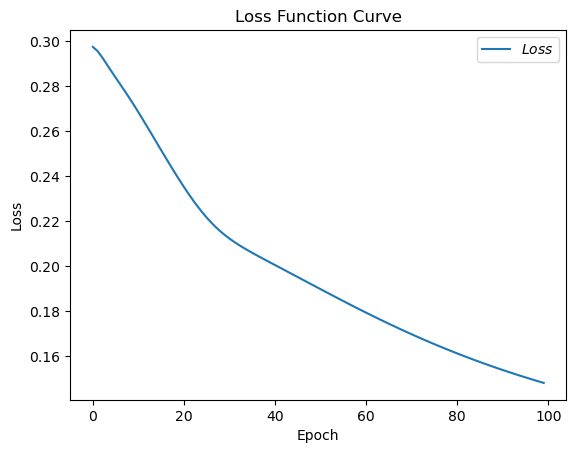

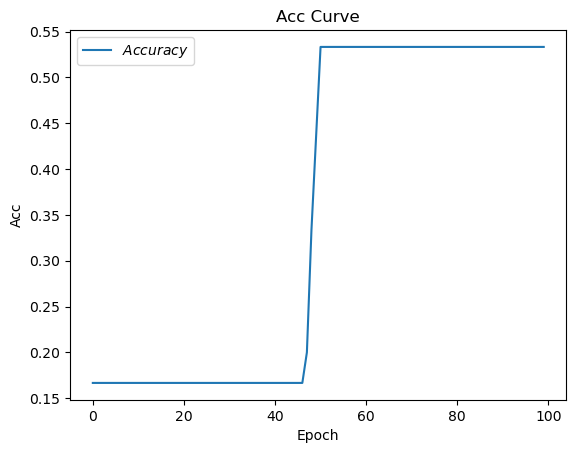

In [6]:
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.01  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 100  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

##########################################################################
m_w, m_b = 0, 0
beta = 0.9
##########################################################################

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        ##########################################################################
        # sgd-momentun  
        m_w = beta * m_w + (1 - beta) * grads[0]
        m_b = beta * m_b + (1 - beta) * grads[1]
        w1.assign_sub(lr * m_w)
        b1.assign_sub(lr * m_b)
    ##########################################################################

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况


# Adagrad优化器

Adagrad优化器，在SGD的基础上增加了二阶动量。

**$t$时刻一阶动量** : $m_t = g_t$

**$t$时刻二阶动量** : $v_t = \sum_{i=1}^{t} g_i^2$  

**$t$时刻下降梯度** :  $\eta_t = lr * m_t / \sqrt{v_t} = lr * g_t / \sqrt{\sum_{i=1}^{t} g_i^2}$

**$t+1$时刻参数** : $w_{t+1} = w_t - \eta_t = w_t - lr * g_t / \sqrt{\sum_{i=1}^{t} g_i^2}$

Adagrad 在TensorFlow中实现：
```python
v_w ,v_b = 0,0

v_w = tf.square(grad_w)
v_b = tf.square(grad_b)

w1.assign_sub(lr * grad_w / tf.sqrt(v_w))
b1.assign_sub(lr * grad_b / tf.sqrt(v_b))
```

---
解释：

 **为什么 $v_t = \sum_{i=1}^{t} g_i^2$**
 
 通过累加梯度的平方，Adagrad算法能够为每个参数提供一个自适应的学习率，这使得它能够在训练过程中根据梯度的变化调整更新步长，从而提高了算法的效率和稳定性。

# Adagradu优化器应用

2024-12-06 15:23:49.978033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [120]
	 [[{{node Placeholder/_1}}]]
2024-12-06 15:23:49.994424: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [30]
	 [[{{node Placeholder/_1}}]]


Epoch 0, loss: 0.286159161478281
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.26981212198734283
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.2586597315967083
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.24967511370778084
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.24231158569455147
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.23632864654064178
Test_acc: 0.16666666666666666
--------------------------
Epoch 6, loss: 0.23152952641248703
Test_acc: 0.16666666666666666
--------------------------
Epoch 7, loss: 0.22770340368151665
Test_acc: 0.16666666666666666
--------------------------
Epoch 8, loss: 0.22463281825184822
Test_acc: 0.16666666666666666
--------------------------
Epoch 9, loss: 0.22211813554167747
Test_acc: 0.16666666666666666
--------------------------
Epoch 10, loss: 0.21999544650316238
Test_acc: 0.16666666666666666
-----------------

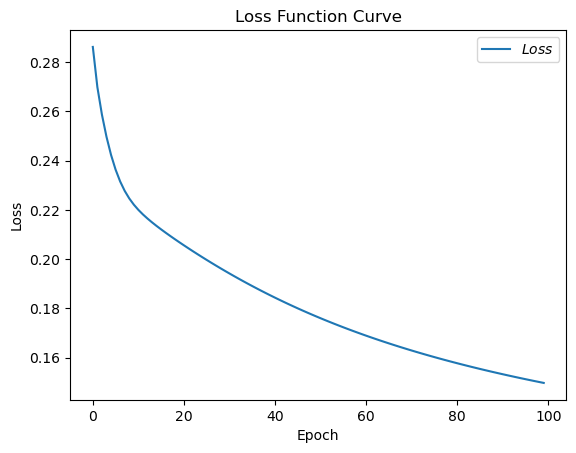

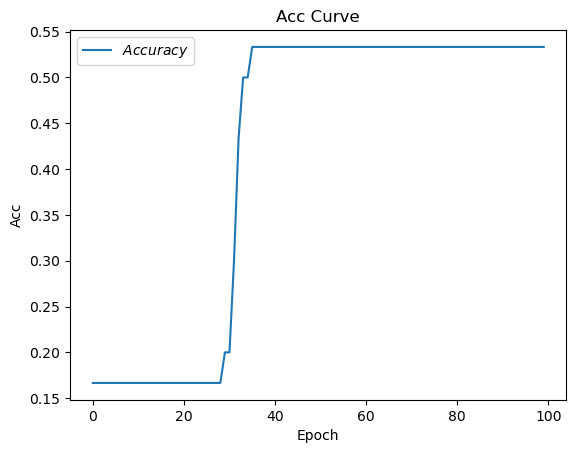

In [9]:
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.01  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 100  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

##########################################################################
v_w, v_b = 0, 0
##########################################################################

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        ##########################################################################
        # adagrad
        v_w += tf.square(grads[0])
        v_b += tf.square(grads[1])
        w1.assign_sub(lr * grads[0] / tf.sqrt(v_w))
        b1.assign_sub(lr * grads[1] / tf.sqrt(v_b))
    ##########################################################################

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况


# RMSProp优化器

RmsProp优化器，在SGD基础上增加二阶动量

**$t$时刻一阶动量** :  $m_t = g_t$ 

**$t$时刻二阶动量** : $v_t = \beta v_{t-1} + (1-\beta)g_t$

**$t$时刻下降梯度** : $\eta_t = lr * m_t / \sqrt{v_t} = lr * \frac{g_t}{\sqrt{\beta v_{t-1} + (1-\beta)g_t}}$

**$t+1$时刻参数** : $w_{t+1} = w_t - \eta_t = w_t - lr * g_t / \sqrt{\beta v_{t-1} + (1-\beta)g_t}$

RMSProp优化器在TensorFlow中实现：

```python
v_w, v_b = 0,0
beta = 0.9

v_w = beta * v_w + (1-beta) * tf.square(w_grad)
v_b = beta * v_b + (1-beta) * tf.square(b_grad)

w1.assign_sub(w_grad * lr / tf.sqrt(v_w))
b1.assign_sub(b_grad * lr / tf.sqrt(v_b))
```

# RMSProp优化器应用

2024-12-06 15:30:32.741963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [120]
	 [[{{node Placeholder/_1}}]]
2024-12-06 15:30:32.765938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [30]
	 [[{{node Placeholder/_1}}]]


Epoch 0, loss: 0.26445747911930084
Test_acc: 0.4666666666666667
--------------------------
Epoch 1, loss: 0.17108935117721558
Test_acc: 1.0
--------------------------
Epoch 2, loss: 0.13472730293869972
Test_acc: 0.5333333333333333
--------------------------
Epoch 3, loss: 0.14635953679680824
Test_acc: 0.5333333333333333
--------------------------
Epoch 4, loss: 0.1370783969759941
Test_acc: 0.5333333333333333
--------------------------
Epoch 5, loss: 0.13287517987191677
Test_acc: 0.5333333333333333
--------------------------
Epoch 6, loss: 0.12770751491189003
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.1231101043522358
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.11812015809118748
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.11451652087271214
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.11514832638204098
Test_acc: 0.5333333333333333
--------------------------
Epoch 11, loss:

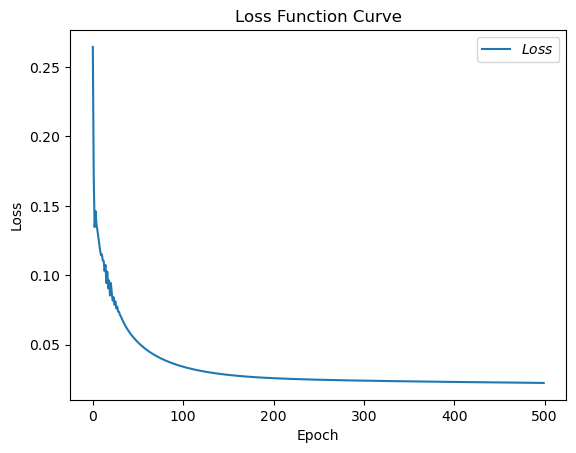

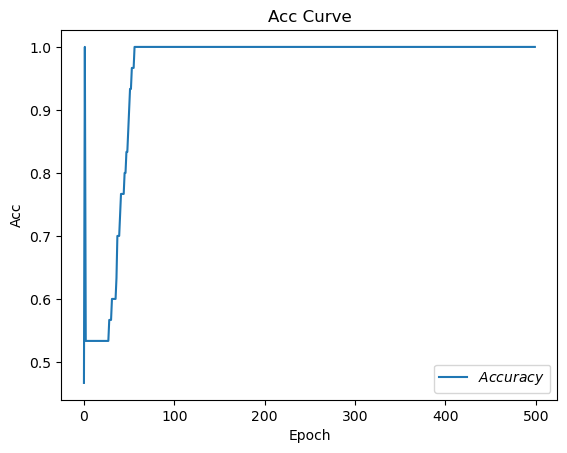

In [12]:
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.05  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

##########################################################################
v_w, v_b = 0, 0
beta = 0.9
##########################################################################

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        ##########################################################################
        # rmsprop
        v_w = beta * v_w + (1 - beta) * tf.square(grads[0])
        v_b = beta * v_b + (1 - beta) * tf.square(grads[1])
        w1.assign_sub(lr * grads[0] / tf.sqrt(v_w))
        b1.assign_sub(lr * grads[1] / tf.sqrt(v_b))
    ##########################################################################

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况


# Adam优化器

Adam，同时结合SGDM优化器的一阶动量和RMSProp优化器的二阶动量

**$t$时刻一阶动量** : $m_t = \beta_1 m_{t-1} + (1-\beta_1)g_t$

 修正一阶动量的偏差 : $ \hat{m}_t = \frac{m_t}{1 - \beta_1^t} $

**$t$时刻二阶动量** : $ v_t = \beta_2 v_{t-1} + (1-\beta_2)g_t^2$

 修正二阶动量的偏差 : $ \hat{v}_t = \frac{v_t}{1 - \beta_2^t} $

**$t$时刻下降梯度** : $ \eta_t = lr \cdot \frac{\frac{m_t}{1 - \beta_1^t}}{\sqrt{\frac{v_t}{1 - \beta_2^t}}} $

**$t+1$时刻参数** : $ w_{t+1} = w_t - \eta_t = w_t - lr \cdot \frac{\frac{m_t}{1 - \beta_1^t}}{\sqrt{\frac{v_t}{1 - \beta_2^t}}}$

在TensorFlow中实现Adam优化器

```python
m_w,m_b = 0,0
v_w,v_b = 0,0
beta1,beta2 = 0.9,0.999
delta_w,delta_b = 0,0
global_step = 0

m_w = beta1*m_w + (1-beta1)*grads['w']
m_b = beta1*m_b + (1-beta1)*grads['b']
v_w = beta2*v_w + (1-beta2)*(tf.square(grads['w']))
v_b = beta2*v_b + (1-beta2)*(tf.square(grads['b']))

m_w_correction = m_w / (1-tf.pow(beta1,int(global_step)))
m_b_correction = m_b / (1-tf.pow(beta1,int(global_step)))
v_w_correction = v_w / (1-tf.pow(beta2,int(global_step)))
v_b_correction = v_b / (1-tf.pow(beta2,int(global_step)))
w1.assign_sub(lr*(m_w_correction/(tf.sqrt(v_w_correction))))
b1.assign_sub(lr*(m_b_correction/(tf.sqrt(v_b_correction))))
```

# Adma优化器应用

2024-12-06 15:26:01.449784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [120]
	 [[{{node Placeholder/_1}}]]
2024-12-06 15:26:01.478415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [30]
	 [[{{node Placeholder/_1}}]]


Epoch 0, loss: 0.2878172844648361
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.2517780624330044
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.22752923518419266
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.21474584937095642
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.2078322432935238
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.19547832384705544
Test_acc: 0.16666666666666666
--------------------------
Epoch 6, loss: 0.18445303291082382
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.1747773252427578
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.16550258174538612
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.15653355419635773
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.14809323102235794
Test_acc: 0.5333333333333333
-----------------------

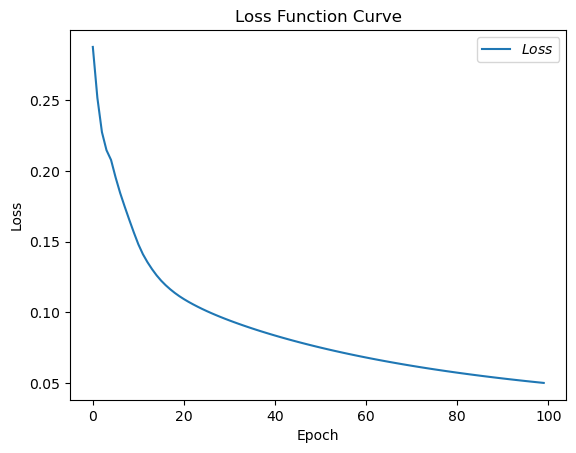

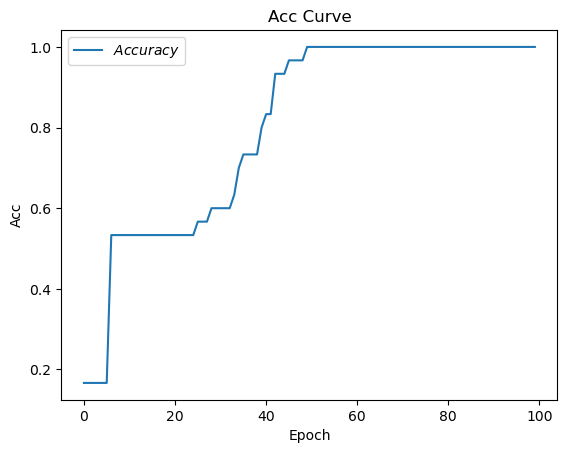

In [11]:
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.01  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 100  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

##########################################################################
m_w, m_b = 0, 0
v_w, v_b = 0, 0
beta1, beta2 = 0.9, 0.999
delta_w, delta_b = 0, 0
global_step = 0
##########################################################################

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
 ##########################################################################       
        global_step += 1
 ##########################################################################       
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

##########################################################################
 # adam
        m_w = beta1 * m_w + (1 - beta1) * grads[0]
        m_b = beta1 * m_b + (1 - beta1) * grads[1]
        v_w = beta2 * v_w + (1 - beta2) * tf.square(grads[0])
        v_b = beta2 * v_b + (1 - beta2) * tf.square(grads[1])

        m_w_correction = m_w / (1 - tf.pow(beta1, int(global_step)))
        m_b_correction = m_b / (1 - tf.pow(beta1, int(global_step)))
        v_w_correction = v_w / (1 - tf.pow(beta2, int(global_step)))
        v_b_correction = v_b / (1 - tf.pow(beta2, int(global_step)))

        w1.assign_sub(lr * m_w_correction / tf.sqrt(v_w_correction))
        b1.assign_sub(lr * m_b_correction / tf.sqrt(v_b_correction))
##########################################################################

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况
